In [14]:
#3/7/24 Neural Net for model creation using Combined Mutagen Chemopy Data with K-Fold
#Suppress unneeded low level warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import math
import sys
sys.path.insert(1, '/Users/james/Documents/Honours/Python')
from Function_Repo import metriccalc
from Function_Repo import nnmetrics
#Data import
#targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/structdata/Mutagen/mutagenMorganfp.csv')
seed = 81
datasets = []
index = []
directory = '/Users/james/Documents/Honours/Data/structdata/endocrine_redux/Chemopy/NR-AR/'
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        df.drop(columns=['SMILES'], inplace=True)
        
        #drops 90% of negative columns to resolve class imbalance
        ytrain = df.iloc[:, 0].values
        reps = 0
        todrop = []
        for item in ytrain:
            if reps % 10 != 0 and item == 0:
                todrop.append(reps)
            reps = reps + 1

        df = df.drop(todrop)
        df = df.dropna(axis=1)
        datasets.append(df)
        index.append(file)

targetdata = datasets[0]
for item in datasets[1:]:
    targetdata = pd.concat([targetdata, item.iloc[:,2:]], axis=1)

targetdata = targetdata.dropna()

#Splitting data into 5 folds 
dfarray = targetdata.to_numpy()
#First set aside 20% of the data for a final validation at the end
dfarray, tempset = train_test_split(dfarray, test_size=0.2, random_state=seed)

size = len(dfarray) / 5
splitsize = math.ceil(size)
empty = [[] for _ in range(5)]
splits = []
for list in empty:
    splits.append(list)

loops = 0
currsplit = 0
#Results in a list of 5 lists that each contain 1/5 of the targetdata
for row in dfarray:
    splits[currsplit].append(row)
    if loops == splitsize:
        loops = 0
        currsplit = currsplit + 1
    loops = loops + 1

folds = []
for split in splits:
    temp = pd.DataFrame(split)
    folds.append(temp)

In [18]:
pd.set_option('display.max_columns', None)
targetdata

,Toxicity_Values,TPSA1,LabuteASA,slogPVSA0,slogPVSA1,slogPVSA2,slogPVSA3,slogPVSA4,slogPVSA5,slogPVSA6,slogPVSA7,slogPVSA8,slogPVSA9,slogPVSA10,slogPVSA11,SMRVSA0,SMRVSA1,SMRVSA2,SMRVSA3,SMRVSA4,SMRVSA5,SMRVSA6,SMRVSA7,SMRVSA8,SMRVSA9,PEOEVSA0,PEOEVSA1,PEOEVSA2,PEOEVSA3,PEOEVSA4,PEOEVSA5,PEOEVSA6,PEOEVSA7,PEOEVSA8,PEOEVSA9,PEOEVSA10,PEOEVSA11,PEOEVSA12,PEOEVSA13,EstateVSA0,EstateVSA1,EstateVSA2,EstateVSA3,EstateVSA4,EstateVSA5,EstateVSA6,EstateVSA7,EstateVSA8,EstateVSA9,EstateVSA10,VSAEstate0,VSAEstate1,VSAEstate2,VSAEstate3,VSAEstate4,VSAEstate5,VSAEstate6,VSAEstate7,VSAEstate8,VSAEstate9,LogP,LogP2,TPSA,UI,Hy,Rnc,nH,nHal,nHet,nHA,nF,nCl,nBr,nI,nC,nP,nS,nO,nN,nRing,nRotB,nHBD,nHBA,nSBond,nDBond,nTBond,nAroBond,nAtom,AWeight,path_L1,path_L2,path_L3,path_L4,path_L5,path_L6,Scar,Shal,Shet,Save,Smax,Smin,DS,Chiv1,Chiv2,Chiv3,Chiv4,Chiv5,Chiv6,Chiv7,Chiv8,Chiv9,Chiv10,Chi3c,Chi4c,Chi4pc,Chi3ch,Chi4ch,Chi5ch,Chi6ch,Chi0,Chi1,Chi2,Chi3,Chi4,Chi5,Chi6,Chi7,Chi8,Chi9,Chi10,Chiv3c,Chiv4c,Chiv4pc,Chiv3ch,Chiv4ch,Chiv5ch,Chiv6ch,mChi1,knotp,dchi0,dchi1,dchi2,dchi3,dchi4,knotpv,IC1,IC2,IC3,IC4,IC5,IC6,SIC0,SIC1,SIC2,SIC3,SIC4,SIC5,SIC6,CIC0,CIC1,CIC2,CIC3,CIC4,CIC5,CIC6,kappam2,kappam3,phi,kappa1,kappa2,kappa3
0,0,124.44,164.116112,10.633577,50.931787,11.215359,5.917906,36.320213,48.922366,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,19.637120,0.0,20.601534,5.917906,38.672151,0.000000,60.179746,0.0,0.000000,18.932752,20.681622,14.573053,4.983979,0.000000,0.000000,44.179310,17.902179,18.814509,12.138036,11.735769,0.000000,5.907180,5.907180,7.118392,30.915785,18.032656,6.420822,5.563451,18.590531,0.000000,44.179310,20.601534,0.000000,19.637120,0.0,0.000000,33.077978,24.450794,0.945683,-1.720342,8.326027,4.783820,3.831024,-1.694984,0.000000,0.36060,0.130032,124.44,3.906891,-0.968770,0.135385,25,0,19,28,0,0,0,0,19,0,4,4,4,2,9,4,6,15,2,0,12,53,12.823036,29,38,44,52,62,56,-51.441927,0.000000,123.441927,2.571429,12.826667,-1.694984,14.521651,9.137899,6.964666,4.113162,2.753967,1.777712,0.851148,0.515640,0.301444,0.182301,0.095154,1.917110,0.000000,3.575437,0.0,0.000000,0.000000,0.204124,20.518297,13.363081,11.957526,8.686165,6.701076,5.509591,2.992198,2.033283,1.438992,0.995680,0.623648,0.987186,0.000000,1.259096,0.0,0.000000,0.000000,0.051320,0.460796,1.658326,4.570529,4.225182,4.992860,4.573003,3.947109,0.271911,3.391160,4.725667,5.043682,5.171132,5.171132,5.171132,0.299008,0.592040,0.825023,0.880543,0.902794,0.902794,0.902794,4.015227,2.336760,1.002253,0.684239,0.556788,0.556788,0.556788,10.531039,7.053904,8.095425,24.271106,12.639889,8.729339
10,0,60.69,35.851837,0.000000,34.637313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,15.319582,0.0,0.000000,0.000000,6.103966,13.213764,0.000000,0.0,0.000000,0.000000,15.319582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.213764,6.103966,0.000000,0.000000,0.000000,0.000000,6.103966,13.213764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.319582,0.000000,0.0,0.000000,0.000000,24.016204,0.000000,0.000000,0.000000,-0.953704,-0.729167,0.000000,0.000000,-1.66810,2.782558,60.69,0.000000,-0.664204,0.334826,8,0,3,6,0,0,0,0,3,0,3,3,0,0,2,3,3,5,0,0,0,14,14.005000,5,5,4,1,0,0,-9.831250,0.000000,32.164583,3.722222,8.166667,-0.953704,9.120370,1.707151,1.018972,0.421498,0.057735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288675,0.000000,0.577350,0.0,0.000000,0.000000,0.000000,4.991564,2.808060,1.921668,1.393847,0.288675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129099,0.000000,0.115470,0.0,0.000000,0.000000,0.000000,0.561612,0.288675,1.658359,1.100909,0.902696,0.972349,0.230940,0.013629,2.298825,3.039149,3.378783,3.378783,2.753434,1.877387,0.371334,0.603785,0.798231,0.887436,0.887436,0.723188,0.493095,2.393555,1.508530,0.768206,0.428571,0.428571,1.053921,1.929968,3.084918,2.880000,3.023220,6.000000,3.200000,3.000000
20,0,58.92,58.367857,0.000000,47.842684,9.473726,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00

In [13]:
zercount = 0
non = 0
for items in datasets[0]['Toxicity_Values']:
    if items == 0:
        zercount = zercount + 1
    else:
        non = non + 1
print(zercount, non)

684 303


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 170, 1)]          0         
                                                                 
 flatten (Flatten)           (None, 170)               0         
                                                                 
 dense (Dense)               (None, 45)                7695      
                                                                 
 dense_1 (Dense)             (None, 1)                 46        
                                                                 
Total params: 7,741
Trainable params: 7,741
Non-trainable params: 0
_________________________________________________________________
3/3 [==============================] - 0s 553us/step


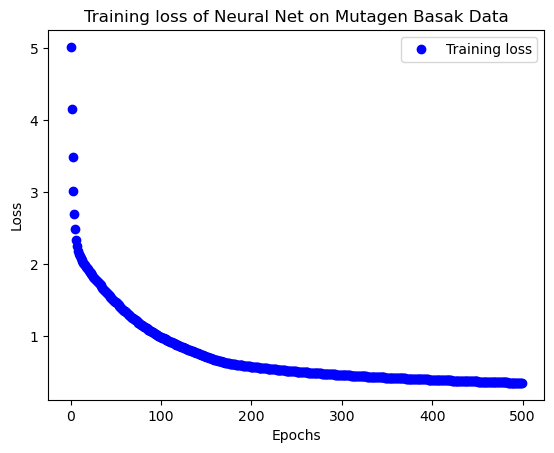

optimal mcc of 0.6394178602964868 at a threshold of 0.66


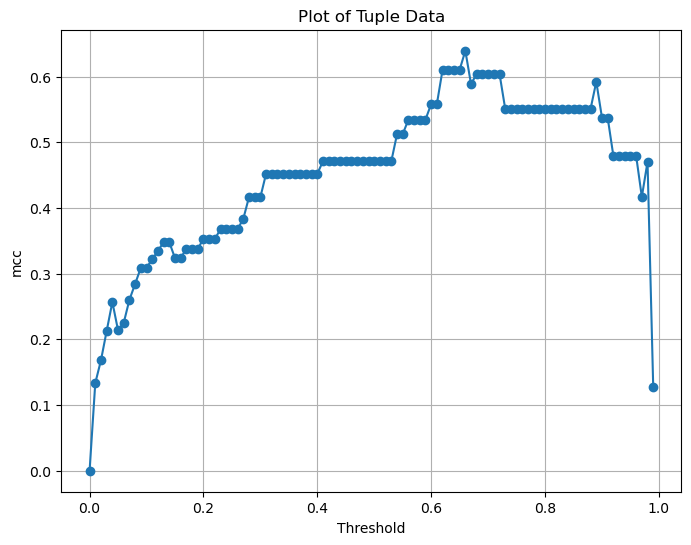

3/3 [==============================] - 0s 553us/step
for model 1 validation metrics of:
positives in data 28
negatives in data 52 

fn count = 16
tn count = 49
tp count = 12
fp count = 3 

net accuracy = 0.7625
positive accuracy = 0.42857142857142855
negative accuracy = 0.9423076923076923 

fpr = 0.057692307692307696
tpr = 0.42857142857142855 

f1 score = 0.5581395348837209
mcc = 0.4532217720285996
cohen Kappa = 0.4153846153846154


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 170, 1)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 170)               0         
                                                                 
 dense_2 (Dense)             (None, 45)                7695      
                                                                 
 dense_3 (Dense)             (None, 1)                 46        
                                                                 
Total params: 7,741
Trainable params: 7,741
Non-trainable params: 0
_________________________________________________________________
3/3 [==============================] - 0s 648us/step


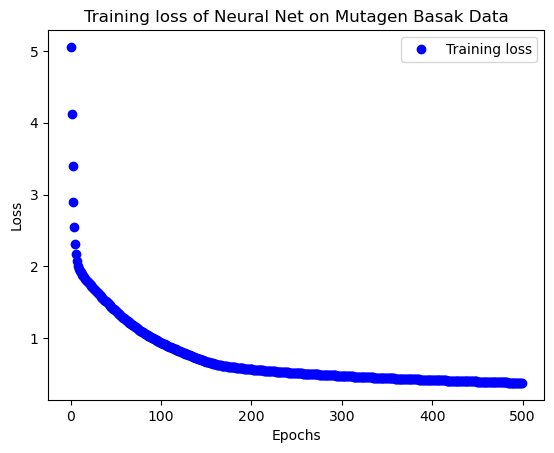

optimal mcc of 0.29514591494904874 at a threshold of 0.71


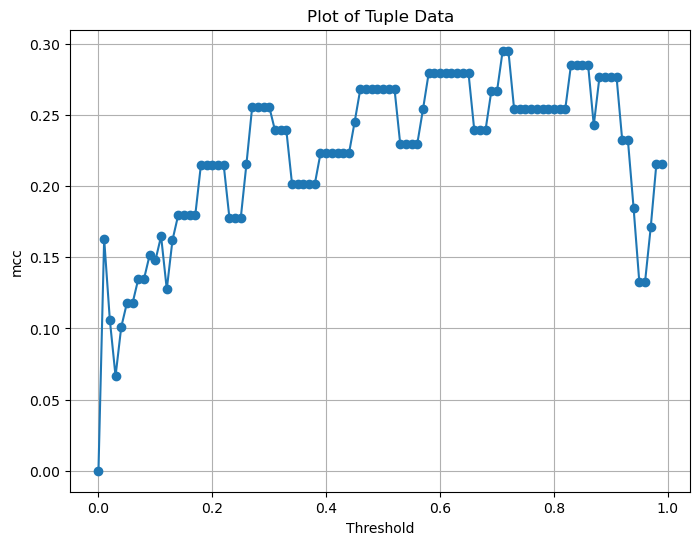

3/3 [==============================] - 0s 568us/step


for model 2 validation metrics of:
positives in data 27
negatives in data 52 

fn count = 14
tn count = 50
tp count = 13
fp count = 2 

net accuracy = 0.7974683544303798
positive accuracy = 0.48148148148148145
negative accuracy = 0.9615384615384616 

fpr = 0.038461538461538464
tpr = 0.48148148148148145 

f1 score = 0.6190476190476191
mcc = 0.5357611452394977
cohen Kappa = 0.4960127591706539
Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 170, 1)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 170)               0         
                                                                 
 dense_4 (Dense)             (None, 45)                7695      
                                                                 
 dense_5 (Dense)             (None, 1)                 46

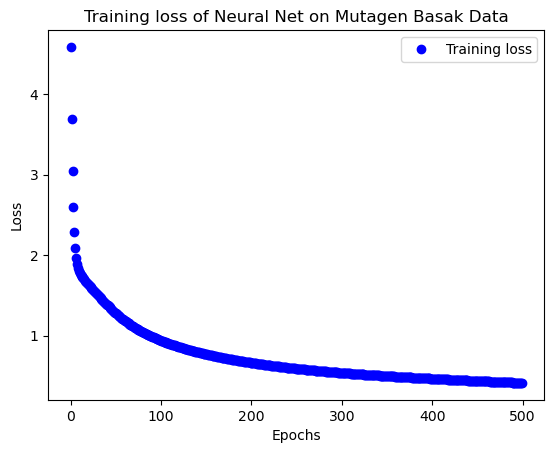

optimal mcc of 0.7633392424765739 at a threshold of 0.66


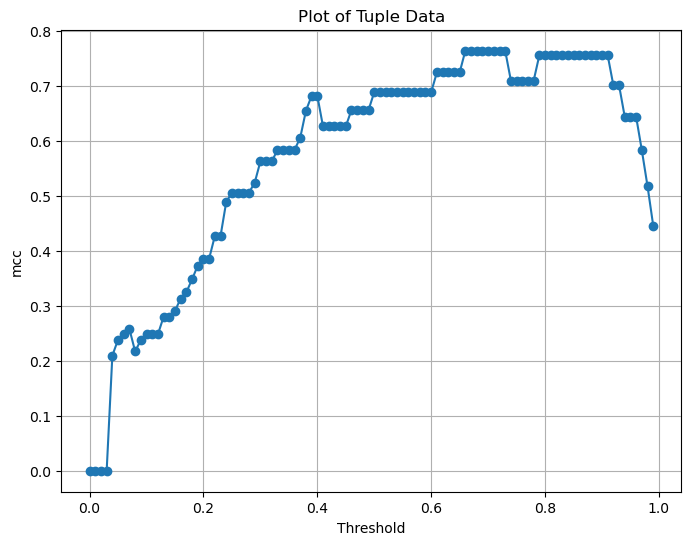

3/3 [==============================] - 0s 567us/step


for model 3 validation metrics of:
positives in data 25
negatives in data 54 

fn count = 12
tn count = 47
tp count = 13
fp count = 7 

net accuracy = 0.759493670886076
positive accuracy = 0.52
negative accuracy = 0.8703703703703703 

fpr = 0.12962962962962962
tpr = 0.52 

f1 score = 0.5777777777777777
mcc = 0.41754446143564244
cohen Kappa = 0.41252446183953034


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 170, 1)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 170)               0         
                                                                 
 dense_6 (Dense)             (None, 45)                7695      
                                                                 
 dense_7 (Dense)             (None, 1)                 46        
                                                                 
Total params: 7,741
Trainable params: 7,741
Non-trainable params: 0
_________________________________________________________________
3/3 [==============================] - 0s 578us/step


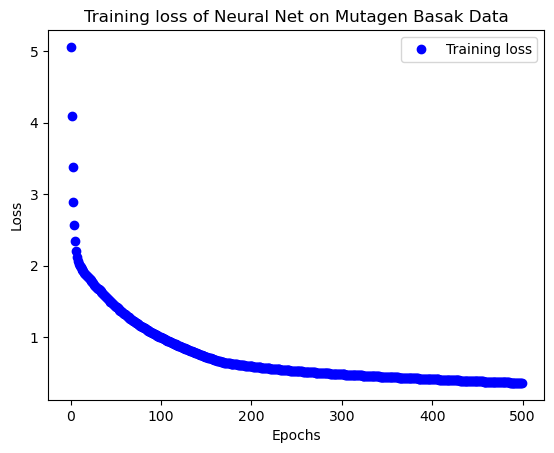

optimal mcc of 0.5045064009132599 at a threshold of 0.6900000000000001


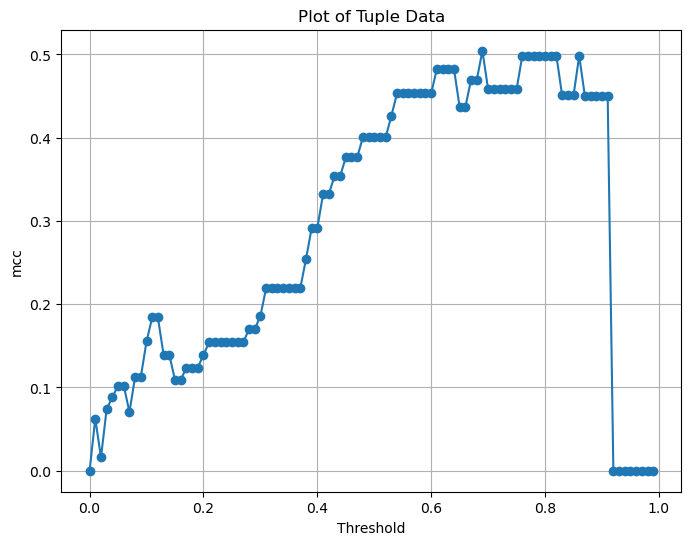

3/3 [==============================] - 0s 581us/step
for model 4 validation metrics of:
positives in data 23
negatives in data 56 

fn count = 12
tn count = 51
tp count = 11
fp count = 5 

net accuracy = 0.7848101265822784
positive accuracy = 0.4782608695652174
negative accuracy = 0.9107142857142857 

fpr = 0.08928571428571429
tpr = 0.4782608695652174 

f1 score = 0.5641025641025641
mcc = 0.4396929763904968
cohen Kappa = 0.42729211087420044


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 170, 1)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 170)               0         
                                                                 
 dense_8 (Dense)             (None, 45)                7695      
                                                                 
 dense_9 (Dense)             (None, 1)                 46        
                                                                 
Total params: 7,741
Trainable params: 7,741
Non-trainable params: 0
_________________________________________________________________
3/3 [==============================] - 0s 563us/step


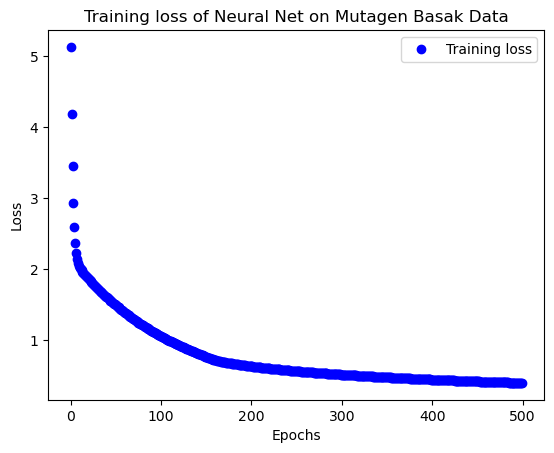

optimal mcc of 0.6219572497476181 at a threshold of 0.56


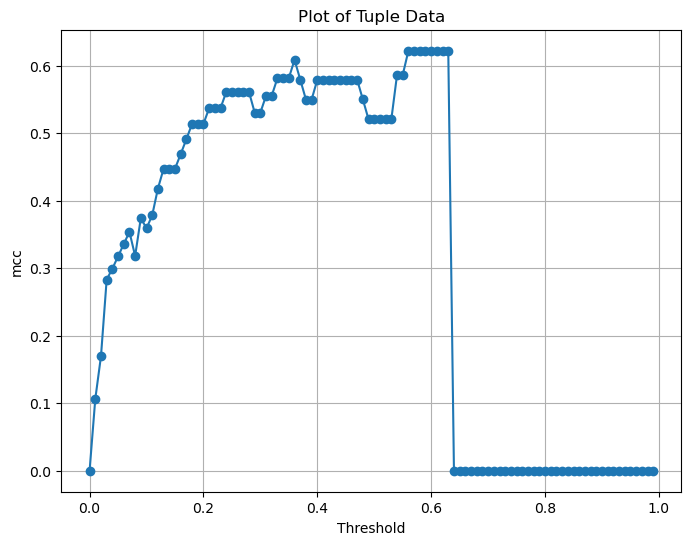

3/3 [==============================] - 0s 549us/step
for model 5 validation metrics of:
positives in data 27
negatives in data 51 

fn count = 9
tn count = 46
tp count = 18
fp count = 5 

net accuracy = 0.8205128205128205
positive accuracy = 0.6666666666666666
negative accuracy = 0.9019607843137255 

fpr = 0.09803921568627451
tpr = 0.6666666666666666 

f1 score = 0.72
mcc = 0.5932660949199264
cohen Kappa = 0.5891647855530474


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
model_list = []
validlist = []
threshlist = []
testdat = []
#For loop that uses each fold once for valid/testing and the rest for training
#Each 'split' in the range corresponds to the set used for test/validation with the other 4 for training
iteration = 1
for split in range(0,5):
    #Set creation
    trainlist = [df for i, df in enumerate(folds) if i != split]
    trainset = pd.concat(trainlist, axis=0)
    #Splits test set into a test and validation set
    testset, validset = train_test_split(folds[split], test_size=0.5, random_state=seed)
    
    ytrain = trainset[0].values
    xtrain = trainset.iloc[:, 1:]
    
    ytest = testset[0].values
    xtest = testset.iloc[:, 1:]
    
    yvalid = validset[0].values
    xvalid = validset.iloc[:, 1:]
    

    # Determines layer size and input/output
    # Here it turns the 334 one hot encoded features to 42
    keras.utils.set_random_seed(seed)
    tf.config.experimental.enable_op_determinism()
    
    length = len(xtrain.columns)
    temp = length
    # Encoder Creation
    enc_in = keras.Input(shape=(length, 1))
    x = keras.layers.Flatten()(enc_in)

    # Additional encoder layers
    #x = keras.layers.Dense(90, activation="relu")(x)
    x = keras.layers.Dense(45, activation="relu")(x)
    #x = keras.layers.Dense(10, activation="relu")(x)

    enc_out = keras.layers.Dense(1, activation="sigmoid")(x)
    autoencoder = keras.Model(enc_in, enc_out, name='autoencoder')
    # Optimiser
    optimise = tf.keras.optimizers.Adam(learning_rate=0.00001)
    
    autoencoder.compile(optimise, loss='binary_crossentropy')
    autoencoder.summary()
    
    #Runs and creates the autoencoder and outputs parameters to a specs file
    ytrain = np.array(ytrain)
    epochs = 500
    batchsize = 16
    losshistory = []

    minloss = 1
    bestepoch = 0
    for epoch in range(epochs):
        verb = 1
        if epoch % 50 != 0:
            verb = 0
        logs = autoencoder.fit(
        xtrain,
        ytrain,
        verbose = verb,
        epochs=1,
        batch_size=batchsize),
        validation_split=0.2,

        #autoencoder.save(str(f"models/AE-{epoch+1}.keras"))
        loss = logs[0].history['loss'][0]
        losshistory.append(loss)
        if loss < minloss:
            minloss = loss
            bestepoch = epoch

    #autoencoder.save(str(f"test/AE-{epoch+1}.keras"))
    model_list.append(autoencoder)
    
    preds = autoencoder.predict(xtest)
    
    epochcount = range(epochs)
    plt.figure()
    plt.plot(epochcount, losshistory, 'bo', label='Training loss')
    plt.title('Training loss of Neural Net on Mutagen Basak Data')
    plt.legend()

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    
    #acc curve creation
    acclist = []
    thresholdlist = []
    maxval = 0
    bestthresh = 0
    for threshold in np.arange(0, 1, 0.01):
        newval = nnmetrics(preds, ytest, threshold)[12]
        acclist.append(newval)
        thresholdlist.append(threshold)
        if newval > maxval:
            maxval = newval
            bestthresh = threshold
    threshlist.append(bestthresh)

    import matplotlib.pyplot as plt
    y_values = acclist
    x_values = thresholdlist

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, marker='o', linestyle='-')

    print('optimal mcc of', maxval, 'at a threshold of', bestthresh)
    testdat.append(maxval)
    # Add titles and labels
    plt.title('Plot of Tuple Data')
    plt.ylabel('mcc')
    plt.xlabel('Threshold')

    # Display the plot
    plt.grid(True)
    plt.show()
    
    
    #check models onto validation set, printing various metrics
    preds = autoencoder.predict(xvalid)
    results = nnmetrics(preds, yvalid, bestthresh)
    validlist.append(results)
    print('for model', iteration, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13])
    iteration = iteration + 1

In [3]:
y = tempset[:, 0]
x = tempset[:, 1:]
iter = 1
loops =0
validdat = []
for model in model_list:
    predictions = []
    preds = model.predict(x)
    predictions.append(preds)
    
    results = nnmetrics(preds, y, threshlist[loops])
    validdat.append(results[12])
    print('model', iter, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13], '\n')
    iter = iter + 1
    
    loops = loops + 1

7/7 [==============================] - 0s 396us/step
model 1 validation metrics of:
positives in data 72
negatives in data 126 

fn count = 27
tn count = 116
tp count = 45
fp count = 10 

net accuracy = 0.8131313131313131
positive accuracy = 0.625
negative accuracy = 0.9206349206349206 

fpr = 0.07936507936507936
tpr = 0.625 

f1 score = 0.7086614173228346
mcc = 0.5860090386731194
cohen Kappa = 0.5747126436781609 

7/7 [==============================] - 0s 363us/step
model 2 validation metrics of:
positives in data 72
negatives in data 126 

fn count = 29
tn count = 118
tp count = 43
fp count = 8 

net accuracy = 0.8131313131313131
positive accuracy = 0.5972222222222222
negative accuracy = 0.9365079365079365 

fpr = 0.06349206349206349
tpr = 0.5972222222222222 

f1 score = 0.6991869918699187
mcc = 0.5871235611918781
cohen Kappa = 0.5693121693121693 

7/7 [==============================] - 0s 450us/step
model 3 validation metrics of:
positives in data 72
negatives in data 126 

fn count

In [10]:
type(x)

numpy.ndarray

In [4]:
#get x and y values for the final validation set
import statistics

toxvals = []
fingerprints = []
for row in tempset:
    toxvals.append(row[0])
    fingerprints.append(row[1:])

#calculates consensus of models on each fingerprint in the final validation set
consensuslist = []
predictions = []

for fp in fingerprints:
    consensus = -1
    fp = fp.reshape(1, -1)
    fp = np.asarray(fp).astype('float32')
    #appends each model's prediction to a list
    predlist = []
    for model in model_list:
        preds = model.predict(fp, verbose = 0)
        predlist.append(preds)
    predictions.append(predlist)
    
    #finds number of 0s in the prediction list
    zercount = 0
    loops = 0
    for modelpreds in predlist:
        if modelpreds < threshlist[loops]:
            zercount = zercount + 1
    loops = loops + 1
    
    #as there are 5 models, if there are less than 3 0s predicted, the consensus is 1
    if zercount < 3 :
        consensus = 1
    else:
        consensus = 0
    consensuslist.append(consensus)
    
#calculate and print metrics
results = metriccalc(consensuslist, toxvals)
print('validation metrics of:')
print('positives in data', results[0])
print('negatives in data', results[1], '\n')
print('fn count =', results[2])
print('tn count =', results[3])
print('tp count =', results[4])
print('fp count =', results[5], '\n')
print('net accuracy =', results[6])
print('positive accuracy =', results[7])
print('negative accuracy =', results[8], '\n')
print('fpr =', results[9])
print('tpr =', results[10], '\n')
print('f1 score =',results[11])
print('mcc =',results[12])
print('cohen Kappa =',results[13])

validation metrics of:
positives in data 72
negatives in data 126 

fn count = 25
tn count = 119
tp count = 47
fp count = 7 

net accuracy = 0.8383838383838383
positive accuracy = 0.6527777777777778
negative accuracy = 0.9444444444444444 

fpr = 0.05555555555555555
tpr = 0.6527777777777778 

f1 score = 0.746031746031746
mcc = 0.6450737269248564
cohen Kappa = 0.6310272536687631


In [5]:
#with open('/Users/james/Documents/Honours/practhesisprep/figure prep/radarplotdata.txt', 'a') as f:
#    print('Chemopy NR-AR NN Consensus MCC =', results[12] , file=f)

In [12]:
testdat

[0.6394178602964868,
 0.29514591494904874,
 0.7633392424765739,
 0.5045064009132599,
 0.6219572497476181]

In [11]:
validdat

[0.5860090386731194,
 0.5871235611918781,
 0.5976293350190476,
 0.6111323313521408,
 0.5981337435350722]